In [14]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [15]:
#loading all the datasets
test_df= pd.read_csv('Housing_dataset_test.csv')
train_df= pd.read_csv('Housing_dataset_train.csv')
sample_df= pd.read_csv('Sample_submission.csv')

#displaying the dataframes
display(test_df.head(2))
display(train_df.head(2))
display(sample_df.head(2))

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4


,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689


,ID
0,845
1,1924


## basic analysis of train and test dataframe


In [16]:
#viewing both dataframes
test_df.shape

(6000, 6)

In [17]:
train_df.shape

(14000, 7)

In [18]:
test_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
dtype: int64

In [19]:
train_df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [20]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [22]:
#train_df.groupby(['title', 'loc'])

### Correlation heatmap

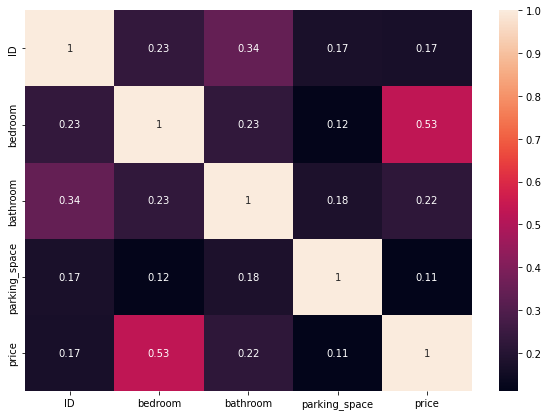

In [23]:
# visualizing correlation coefficients between the columns
corr = train_df.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot = True);

- From the above we see bedroom has the highest correlation to price.

### Dealing with the missing values

In [35]:
# dropping rows with null values in title and loc columns
train_df= train_df.dropna(subset=['loc', 'title'])
train_df.shape

(10531, 7)

In [24]:
train_df.columns

Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [25]:
train_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [28]:
train_df.isna().sum()

ID                  0
loc                 0
title               0
bedroom          1675
bathroom         1672
parking_space    1671
price               0
dtype: int64

In [29]:
#defining the columns with null values 
columns_with_na= ['bedroom', 'bathroom', 'parking_space']

#creating a loop to fill the null values
#col_avg is the avg value of the column grouped by title
for col in columns_with_na:
    col_avg = train_df.groupby(['title'])[col].transform('mean')
    train_df[col]= train_df[col].fillna(col_avg)
train_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

col_avg = np.round(train_df.groupby(['title'])['bedroom'].mean(), 1)

col_avg= col_avg.to_dict()

col_avg


mean_values = train_df.groupby('title')['bedroom'].transform('mean')
df=train_df[['bedroom']].copy()
df['bedroom2']=train_df['bedroom']
df['bedroom2'] = df['bedroom2'].fillna(mean_values)


In [31]:
train_df.shape

(10531, 7)

In [32]:
train_df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

## cleaning the train dataset and exploring

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10531 non-null  int64  
 1   loc            10531 non-null  object 
 2   title          10531 non-null  object 
 3   bedroom        10531 non-null  float64
 4   bathroom       10531 non-null  float64
 5   parking_space  10531 non-null  float64
 6   price          10531 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 658.2+ KB


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'bedroom'}>],
       [<AxesSubplot:title={'center':'bathroom'}>,
        <AxesSubplot:title={'center':'parking_space'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

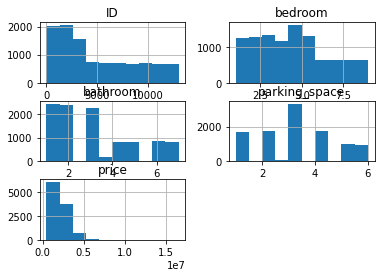

In [34]:
train_df.hist()

- I notice that the price column is right skewed

## Univariate visualizations

In [13]:
train_df['loc'].sort_values().unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina',
       'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun',
       'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba',
       'Yobe', 'Zamfara', nan], dtype=object)

<AxesSubplot:xlabel='count', ylabel='loc'>

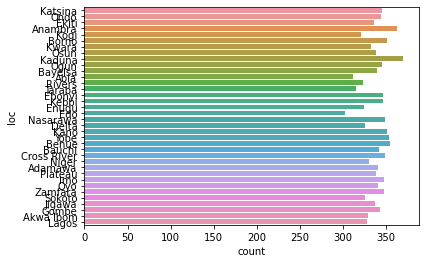

In [14]:
sns.countplot(y='loc', data= train_df)

In [15]:
train_df.title.value_counts()

Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: title, dtype: int64

In [16]:
train_df.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [17]:
plt.figure(figsize=[12,12])

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='title'>

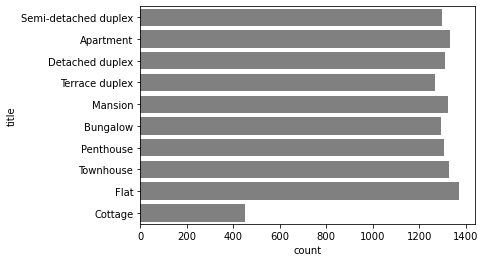

In [18]:
sns.countplot(data= train_df, y='title', color= 'gray', )

##anotate bars if there's time

### It is clear cottages are not as common as other house types in Nigeria

In [19]:
sns.countplot(data= train_df, y='title', x=np.avg('price') )

AttributeError: module 'numpy' has no attribute 'avg'

<AxesSubplot:>

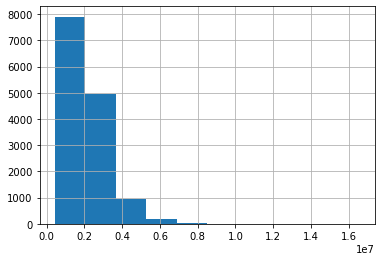

In [20]:

train_df.price.hist()


In [21]:
train_df.plot(x=avg(price))

NameError: name 'avg' is not defined

In [22]:
vv= train_df.groupby('title').price.avg()

AttributeError: 'SeriesGroupBy' object has no attribute 'avg'

### Preprocessing


In [36]:
# importing libraries required
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [37]:
#importing libraries for modelling
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [38]:
#dropping price column and joining both train_df and test_df
all_data= train_df.drop(columns=['price'], axis=1).append(test_df)
all_data.shape

(16531, 6)

In [39]:
train_df.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [40]:
all_data.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [41]:
# Ranking the house titles
title_rank= {
    'Cottage': 1,
    'Flat': 2,
    'Apartment': 3 ,
    'Townhouse' : 4,
    'Terrace duplex': 5 ,
    'Semi-detached duplex':6 ,
    'Detached duplex': 7 ,
    'Bungalow' : 8,
    'Penthouse': 9 ,
    'Mansion': 10
}

In [42]:
# mapping the titles 
all_data['title']= all_data['title'].map(title_rank)

all_data.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,Katsina,6,2.000000,2.0,1.0
1,2748,Ondo,3,4.386792,2.0,4.0
3,2224,Anambra,7,5.000000,2.0,4.0
4,10300,Kogi,5,4.367061,5.0,6.0
5,1733,Borno,10,4.341595,1.0,3.0


In [43]:
#normalizing the value_count of loc to create distinct figures rank
cat_frequency= all_data['loc'].value_counts(normalize=True)

# mapping the location to this
loc_rank= cat_frequency.to_dict()

loc_rank

{'Benue': 0.030064726876776963,
 'Borno': 0.029883249652168653,
 'Anambra': 0.02964128001935757,
 'Oyo': 0.029278325570140946,
 'Ogun': 0.029217833161938177,
 'Cross River': 0.029036355937329866,
 'Kaduna': 0.02873389389631601,
 'Zamfara': 0.0285524166717077,
 'Kano': 0.02849192426350493,
 'Nasarawa': 0.02824995463069385,
 'Ondo': 0.02824995463069385,
 'Katsina': 0.02824995463069385,
 'Yobe': 0.028189462222491076,
 'Kebbi': 0.028128969814288307,
 'Imo': 0.028007984997882766,
 'Bauchi': 0.028007984997882766,
 'Plateau': 0.027826507773274455,
 'Adamawa': 0.027826507773274455,
 'Niger': 0.027584538140463372,
 'Kogi': 0.027584538140463372,
 'Ekiti': 0.027584538140463372,
 'Osun': 0.02746355332405783,
 'Gombe': 0.02746355332405783,
 'Abia': 0.02728207609944952,
 'Sokoto': 0.027221583691246748,
 'Lagos': 0.027100598874841206,
 'Taraba': 0.027100598874841206,
 'Enugu': 0.027040106466638437,
 'Delta': 0.026979614058435665,
 'Ebonyi': 0.026919121650232896,
 'Jigawa': 0.026858629242030124,
 'Bay

In [44]:
# replacing values with the map
all_data['loc']= all_data['loc'].map(loc_rank)

#print new dataframe
all_data.head()


,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028250,6,2.000000,2.0,1.0
1,2748,0.028250,3,4.386792,2.0,4.0
3,2224,0.029641,7,5.000000,2.0,4.0
4,10300,0.027585,5,4.367061,5.0,6.0
5,1733,0.029883,10,4.341595,1.0,3.0


In [45]:
all_data.shape

(16531, 6)

In [47]:
train_df.shape[0]==14000

False

In [99]:
# splitting all data into x, y and test_df 
x= all_data[:train_df.shape[0]]
y= train_df['price']
test_df= all_data[train_df.shape[0]:]

#checking the outcome
x.shape, y.shape, test_df.shape

((10531, 6), (10531,), (6000, 6))

In [51]:
x.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,3583,0.028250,6,2.000000,2.0,1.0
1,2748,0.028250,3,4.386792,2.0,4.0
3,2224,0.029641,7,5.000000,2.0,4.0
4,10300,0.027585,5,4.367061,5.0,6.0
5,1733,0.029883,10,4.341595,1.0,3.0


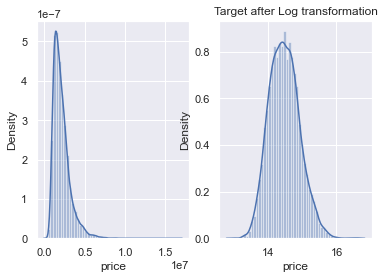

In [52]:
# copied

sns.set()
y_transformed = pd.Series(np.log1p(y))

fig, ax = plt.subplots(1, 2)
sns.distplot(y, ax=ax[0])
plt.title("Target after Log transformation")
# ax[0].axvline(y_transformed)
sns.distplot(y_transformed, ax=ax[1])
plt.show()


In [53]:
x.drop(['ID'], axis=1, inplace=True)

### Modelling

In [70]:
# importing other models to test out 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [81]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10531 entries, 0 to 13998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            10531 non-null  float64
 1   title          10531 non-null  int64  
 2   bedroom        10531 non-null  float64
 3   bathroom       10531 non-null  float64
 4   parking_space  10531 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 493.6 KB


In [100]:
#splitting train_df into data to train and one to test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [102]:
# calling the model function
lightb_model= LGBMRegressor()

#training/ fitting the model on the X_train, y_train data
lightb_model.fit(X_train, y_train)

#making the prediction on part of the train data
lightb_pred= lightb_model.predict(X_test)

# checking the mean squared error
print(f'mse = {mean_squared_error(y_test, catb_pred, squared=False)}')


# printing the prediction
lightb_pred


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 8424, number of used features: 6
[LightGBM] [Info] Start training from score 2120076.643526
mse = 486129.8056455393


array([1204507.45623107, 2255990.81408883, 2839109.2122952 , ...,
       3991723.79621013, 3107359.22592998, 1915590.39396871])

In [86]:
# calling the model function
catb_model= CatBoostRegressor()

#training/ fitting the model on the X_train, y_train data
catb_model.fit(X_train, y_train)

#making the prediction on part of the train data
catb_pred= catb_model.predict(X_test)

# printing the prediction

catb_pred

Learning rate set to 0.057334
0:	learn: 1034346.6879981	total: 5.59ms	remaining: 5.59s
1:	learn: 1003114.2622225	total: 9.74ms	remaining: 4.86s
2:	learn: 973477.7353380	total: 13.4ms	remaining: 4.46s
3:	learn: 946578.4847483	total: 16.3ms	remaining: 4.05s
4:	learn: 922855.6194571	total: 18.7ms	remaining: 3.71s
5:	learn: 900923.3948517	total: 21ms	remaining: 3.48s
6:	learn: 881565.5856209	total: 22.9ms	remaining: 3.25s
7:	learn: 862481.2395248	total: 25ms	remaining: 3.1s
8:	learn: 842834.6663967	total: 27ms	remaining: 2.97s
9:	learn: 824929.1213177	total: 28.9ms	remaining: 2.86s
10:	learn: 808176.1959548	total: 30.5ms	remaining: 2.74s
11:	learn: 793491.2438388	total: 32.2ms	remaining: 2.65s
12:	learn: 779307.5844123	total: 33.9ms	remaining: 2.58s
13:	learn: 766124.1104208	total: 35.5ms	remaining: 2.5s
14:	learn: 754954.7112393	total: 37.3ms	remaining: 2.45s
15:	learn: 744055.6815042	total: 38.9ms	remaining: 2.39s
16:	learn: 732044.2437085	total: 40.6ms	remaining: 2.35s
17:	learn: 723248

192:	learn: 488360.4279567	total: 337ms	remaining: 1.41s
193:	learn: 488166.7304432	total: 339ms	remaining: 1.41s
194:	learn: 488005.6630962	total: 341ms	remaining: 1.41s
195:	learn: 487867.7080861	total: 343ms	remaining: 1.41s
196:	learn: 487696.5908527	total: 345ms	remaining: 1.41s
197:	learn: 487372.8988728	total: 347ms	remaining: 1.41s
198:	learn: 486594.1294993	total: 349ms	remaining: 1.4s
199:	learn: 486363.9917356	total: 350ms	remaining: 1.4s
200:	learn: 486061.3543834	total: 352ms	remaining: 1.4s
201:	learn: 485583.1490326	total: 355ms	remaining: 1.4s
202:	learn: 485319.2487318	total: 356ms	remaining: 1.4s
203:	learn: 485002.4406597	total: 358ms	remaining: 1.4s
204:	learn: 484823.9782490	total: 360ms	remaining: 1.4s
205:	learn: 484603.8309820	total: 361ms	remaining: 1.39s
206:	learn: 484483.4875220	total: 363ms	remaining: 1.39s
207:	learn: 483725.9466326	total: 365ms	remaining: 1.39s
208:	learn: 483486.7845508	total: 367ms	remaining: 1.39s
209:	learn: 483267.9313317	total: 368m

354:	learn: 457673.8217579	total: 654ms	remaining: 1.19s
355:	learn: 457480.6142083	total: 656ms	remaining: 1.19s
356:	learn: 457441.5662638	total: 658ms	remaining: 1.18s
357:	learn: 457301.7114353	total: 660ms	remaining: 1.18s
358:	learn: 457221.0699747	total: 662ms	remaining: 1.18s
359:	learn: 457099.5913179	total: 663ms	remaining: 1.18s
360:	learn: 456972.3744968	total: 665ms	remaining: 1.18s
361:	learn: 456660.4491025	total: 668ms	remaining: 1.18s
362:	learn: 456573.7536905	total: 670ms	remaining: 1.17s
363:	learn: 456517.5017352	total: 672ms	remaining: 1.17s
364:	learn: 456443.4564766	total: 675ms	remaining: 1.17s
365:	learn: 456277.6142969	total: 677ms	remaining: 1.17s
366:	learn: 456210.7352713	total: 679ms	remaining: 1.17s
367:	learn: 456143.1304751	total: 681ms	remaining: 1.17s
368:	learn: 456059.0641439	total: 683ms	remaining: 1.17s
369:	learn: 455894.6573729	total: 685ms	remaining: 1.17s
370:	learn: 455823.0961043	total: 687ms	remaining: 1.17s
371:	learn: 455714.6809962	tota

542:	learn: 438018.8497896	total: 1.01s	remaining: 848ms
543:	learn: 437985.4804734	total: 1.01s	remaining: 846ms
544:	learn: 437735.8655269	total: 1.01s	remaining: 844ms
545:	learn: 437690.5894877	total: 1.01s	remaining: 843ms
546:	learn: 437407.8410031	total: 1.01s	remaining: 841ms
547:	learn: 437353.6250924	total: 1.02s	remaining: 839ms
548:	learn: 437196.6856754	total: 1.02s	remaining: 837ms
549:	learn: 437092.7008287	total: 1.02s	remaining: 836ms
550:	learn: 436963.3197708	total: 1.02s	remaining: 834ms
551:	learn: 436906.1151407	total: 1.02s	remaining: 833ms
552:	learn: 436859.6769460	total: 1.03s	remaining: 831ms
553:	learn: 436754.7770310	total: 1.03s	remaining: 829ms
554:	learn: 436700.3942670	total: 1.03s	remaining: 827ms
555:	learn: 436574.7230625	total: 1.03s	remaining: 825ms
556:	learn: 436500.5661401	total: 1.03s	remaining: 823ms
557:	learn: 436451.0346548	total: 1.04s	remaining: 821ms
558:	learn: 436364.5979023	total: 1.04s	remaining: 819ms
559:	learn: 436313.7677185	tota

720:	learn: 421980.5043885	total: 1.34s	remaining: 519ms
721:	learn: 421776.0171951	total: 1.34s	remaining: 518ms
722:	learn: 421718.5593923	total: 1.35s	remaining: 516ms
723:	learn: 421653.4957110	total: 1.35s	remaining: 514ms
724:	learn: 421615.8154410	total: 1.35s	remaining: 512ms
725:	learn: 421500.7248913	total: 1.35s	remaining: 510ms
726:	learn: 421444.6620713	total: 1.35s	remaining: 508ms
727:	learn: 421403.8894419	total: 1.36s	remaining: 507ms
728:	learn: 421352.8171654	total: 1.36s	remaining: 505ms
729:	learn: 421262.7449871	total: 1.36s	remaining: 503ms
730:	learn: 421197.5482835	total: 1.36s	remaining: 501ms
731:	learn: 421110.9865109	total: 1.36s	remaining: 499ms
732:	learn: 421088.4526497	total: 1.36s	remaining: 497ms
733:	learn: 421017.7550837	total: 1.37s	remaining: 496ms
734:	learn: 420947.3258198	total: 1.37s	remaining: 494ms
735:	learn: 420810.2689983	total: 1.37s	remaining: 492ms
736:	learn: 420752.3723130	total: 1.37s	remaining: 490ms
737:	learn: 420666.1746994	tota

917:	learn: 408223.9626728	total: 1.69s	remaining: 151ms
918:	learn: 408190.8831486	total: 1.69s	remaining: 149ms
919:	learn: 408089.5193150	total: 1.69s	remaining: 147ms
920:	learn: 408023.1888096	total: 1.69s	remaining: 145ms
921:	learn: 407958.4569243	total: 1.69s	remaining: 143ms
922:	learn: 407918.0024312	total: 1.69s	remaining: 141ms
923:	learn: 407861.7658617	total: 1.7s	remaining: 140ms
924:	learn: 407797.1854398	total: 1.7s	remaining: 138ms
925:	learn: 407731.9161221	total: 1.7s	remaining: 136ms
926:	learn: 407671.2364798	total: 1.7s	remaining: 134ms
927:	learn: 407579.7147728	total: 1.7s	remaining: 132ms
928:	learn: 407537.1446556	total: 1.71s	remaining: 130ms
929:	learn: 407468.6986481	total: 1.71s	remaining: 129ms
930:	learn: 407444.2821632	total: 1.71s	remaining: 127ms
931:	learn: 407369.9691003	total: 1.71s	remaining: 125ms
932:	learn: 407294.1685401	total: 1.71s	remaining: 123ms
933:	learn: 407263.3669994	total: 1.72s	remaining: 121ms
934:	learn: 407224.5463790	total: 1.

array([1170492.69948895, 2249182.84666031, 2971417.83428377, ...,
       3547639.16376599, 3041401.31400998, 1854223.6526323 ])



# calling the model function
log_reg= LogisticRegression()

#training/ fitting the model on the X_train, y_train data
log_reg.fit(X_train, y_train)

#making the prediction on part of the train data
lr_pred= log_reg.predict(X_test)

# printing the prediction

lr_pred

In [104]:
# creating copy of test_df to predict
toPredict= test_df.copy()

#running the model
model3=lightb_model.predict(test_df)

#converting the price prediction to a column
toPredict['price']= model4

#selecting the needed columns as seen in sample submission
model_sub4= toPredict[['ID', 'price']]

#converting dataframe back to csv file
modelsub4.to_csv('model_sub4.csv', index= False)

In [60]:
model3

array([2428413.49158666, 1022473.07654151, 1281242.85242438, ...,
       1943784.0407785 , 1501836.64471796, 3263713.72626116])

In [105]:
test_df['price']=model3

In [76]:
test_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,845,0.028492,9,4.0,1.0,2.0,2.376612e+06
1,1924,0.027827,3,2.0,2.0,4.0,1.031066e+06
2,10718,0.027827,8,2.0,7.0,2.0,1.237434e+06
3,12076,0.027101,10,9.0,5.0,2.0,4.481267e+06
4,12254,0.027464,6,5.0,6.0,1.0,1.954795e+06


In [106]:
model_sub3= test_df[['ID', 'price']]

In [107]:
model_sub3.head()

,ID,price
0,845,2.311168e+06
1,1924,1.026541e+06
2,10718,1.325142e+06
3,12076,6.428314e+06
4,12254,2.016897e+06


### Testing model

### Saving submission file

In [108]:

model_sub3.to_csv('model_sub3.csv', index=False)